<a href="https://colab.research.google.com/github/dimasw09/BelajarKoding/blob/main/Clustering_Iris_Flower_Species_Using_Self_Organizing_Maps_(SOM)_for_Visualization_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name iris exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/usr/local/lib/python3.10/dist-packages/minisom.py:162: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


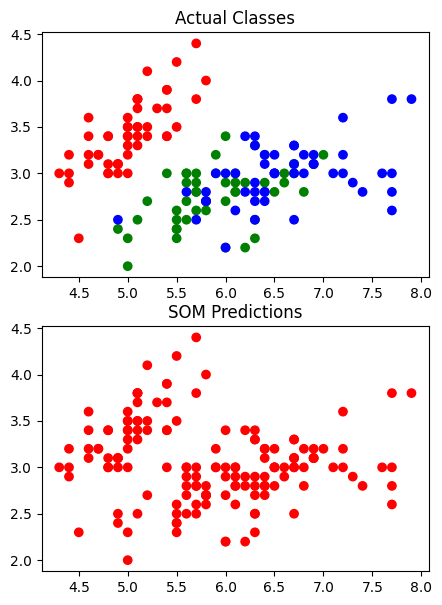

In [12]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from minisom import MiniSom
import numpy as np
from sklearn.preprocessing import LabelEncoder

from sklearn.datasets import fetch_openml

# Load Iris data from online source
iris = fetch_openml(name='iris', as_frame=True)

# Extract the features and target labels
iris_data = iris.data.to_numpy()
iris_label = iris.target

# Encode the target labels
label_encoder = LabelEncoder()
iris_label_encoded = label_encoder.fit_transform(iris_label)

# Extract just two features (just for ease of visualization)
iris_data = iris_data[:, :2]

# Build a 3x1 SOM (3 clusters)
som = MiniSom(3, 1, 2, random_seed=1234)

# Initialize the SOM with random weights
som.random_weights_init(iris_data)

# Train the SOM
som.train(iris_data, 100)  # Adjust the number of iterations as needed

# Find the best matching unit (BMU) for each input sample
bmu_labels = np.array([som.winner(x) for x in iris_data])

# Map the BMU labels to cluster labels
cluster_labels = np.argmax(bmu_labels, axis=1)

# Plot the results
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5, 7))
x = iris_data[:, 0]
y = iris_data[:, 1]
colors = ['red', 'green', 'blue']

ax[0].scatter(x, y, c=iris_label_encoded, cmap=ListedColormap(colors))
ax[0].set_title('Actual Classes')
ax[1].scatter(x, y, c=cluster_labels, cmap=ListedColormap(colors))
ax[1].set_title('SOM Predictions')
plt.savefig('iris_example.png')
